pygame 2.1.2 (SDL 2.0.18, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
[{'box': (263, 176, 124, 124), 'emotions': {'angry': 0.11, 'disgust': 0.0, 'fear': 0.04, 'happy': 0.11, 'sad': 0.19, 'surprise': 0.01, 'neutral': 0.54}}]
neutral 0.54


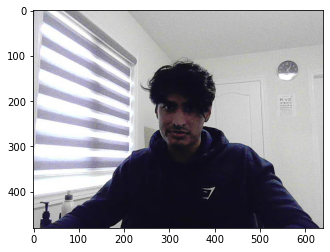

In [1]:
#NTO
from tkinter import *
import pygame
import random
import time

#creating and naming window
window = Tk()
window.title("First Window")
#Changing background colour
window.configure(background="black")
#Changing window size
width, height = window.winfo_screenwidth(), window.winfo_screenheight()
window.geometry('%dx%d+0+0' % (width,height))

#Title
#Label (window,text="BGM SYSTEM", bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
pygame.mixer.init()


def tester():
    #Taking picture
    import cv2
    # initialize the camera
    cam = cv2.VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    if s:    # frame captured without any errors
        # cv2.namedWindow("cam-test",cv2.CV_WINDOW_AUTOSIZE())
        cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
        cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
        cv2.waitKey(0)
        cv2.imwrite("emotion.jpg",img) #save image

        #Photo emotion recognition
    import tensorflow
    from fer import FER
    import matplotlib.pyplot as plt 
    %matplotlib inline

    test_image_one = plt.imread("emotion.jpg")
    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(test_image_one)
    # Print all captured emotions with the image
    print(captured_emotions)
    plt.imshow(test_image_one)

    # Use the top Emotion() function to call for the dominant emotion in the image
    dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
    print(dominant_emotion, emotion_score)
    filename = "%s.mp3" %dominant_emotion
    pygame.mixer.music.load(filename)

soundplay = 0
music = "PAUSE"
def playsound():
    global soundplay
    soundplay+=1
    if (soundplay==1):
        tester()
        pygame.mixer.music.play()
        Button (window, image=pause, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
    elif (soundplay%2==0):
        pygame.mixer.music.pause()
        Button (window, image=play, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
    else:
        pygame.mixer.music.unpause()  
        Button (window, image=pause, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
def play_next():
    tester()
    pygame.mixer.music.play()

def close_window():
    window.destroy()
    pygame.mixer.music.stop()

        
#Use this for skipping - pygame.mixer.music.fadeout
back = PhotoImage(file="Back")
Button (window, image=back, bg="black", bd=0).place(relx=0.35, rely=0.5, anchor=CENTER)

play = PhotoImage(file="Play")
pause = PhotoImage(file="Pause")
Button (window, image=play, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)

next = PhotoImage(file="Next")
Button (window, image=next, command=play_next, bg="black", bd=0).place(relx=0.65, rely=0.5, anchor=CENTER)

exit = PhotoImage(file="exit1.gif")
Button (window, image=exit, command=close_window).place(relx=0.98, rely=0, anchor=N)

#running the main window
window.mainloop()

In [ ]:
#TO
#You-sic
from tkinter import *
import pygame
import random
import time

#creating and naming window
window = Tk()
window.title("First Window")
#Changing background colour
#window.configure(background="black")

#Changing window size
width, height = window.winfo_screenwidth(), window.winfo_screenheight()
window.geometry('%dx%d+0+0' % (width,height))

#Background
bg = PhotoImage(file = "Sad_Background.gif")
label1 = Label( window, image = bg)
label1.place(x = 0, y = 0)
label1.lower()
bg_order = 0

#Title
name="Not Playing"
Label (window,text=name, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)

pygame.init()


lastmood = ""
skip = "n"
def tester():
    #Taking picture
    import cv2
    global lastmood
    # initialize the camera
    cam = cv2.VideoCapture(0)   # 0 -> index of camera
    s, img = cam.read()
    if s:    # frame captured without any errors
        # cv2.namedWindow("cam-test",cv2.CV_WINDOW_AUTOSIZE())
        cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
        cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
        cv2.waitKey(0)
        cv2.imwrite("emotion.jpg",img) #save image
        
        #Photo emotion recognition
    import tensorflow
    from fer import FER
    import matplotlib.pyplot as plt 
    %matplotlib inline

    test_image_one = plt.imread("emotion.jpg")
    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(test_image_one)
    # Print all captured emotions with the image
    print(captured_emotions)
    plt.imshow(test_image_one)

    # Use the top Emotion() function to call for the dominant emotion in the image
    dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
    print(dominant_emotion, emotion_score)
    
    #Determining the mood and assigning a file
    global currentmood
    currentmood=dominant_emotion
    filename = "%s.mp3" %dominant_emotion
    
    #For automatic next song
    a = pygame.mixer.Sound(filename)
    #Getting the length of the song and converting it to milliseconds (and adding an extra second)
    length = int(a.get_length()*1000)+1
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()
    name="Playing"
    Label (window,text=name, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
    MUSIC_END = pygame.USEREVENT+1
    SONG_END = pygame.USEREVENT
    pygame.mixer.music.set_endevent(MUSIC_END)
    #Changes track after song is done
    window.after(length, check_event)
    #We can also make it change tracks every few minutes (but we need to ensure that the music flows)
    
    #Changing Background
    global bg_order
    global label1
    global label2
    
    if (bg_order%2==0):
        label1.destroy()
        background = "%s_Background.gif" %dominant_emotion
        bg = PhotoImage(file = background)
        label2 = Label( window, image = bg)
        label2.place(x = 0, y = 0)
        label2.lower()
    else:
        label2.destroy()
        background = "%s_Background.gif" %dominant_emotion
        bg = PhotoImage(file = background)
        label1 = Label( window, image = bg)
        label1.place(x = 0, y = 0)
        label1.lower()


soundplay = 0
music = "PAUSE"
def playsound():
    global soundplay
    soundplay+=1
    if (soundplay==1):
        Button (window, image=pause, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
        tester()
    elif (soundplay%2==0):
        pygame.mixer.music.pause()
        Button (window, image=play, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
    else:
        pygame.mixer.music.unpause()  
        Button (window, image=pause, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
    #Song Length
    play_time()
def play_next():
    pygame.mixer.music.fadeout
    global lastmood
    lastmood=currentmood
    tester()
def go_back():
    pygame.mixer.music.fadeout
    filename = "%s.mp3" %lastmood
    pygame.mixer.music.load(filename)
    pygame.mixer.music.play()    

def close_window():
    window.destroy()
    pygame.mixer.music.stop()
    
def check_event():
    for event in pygame.event.get():
        if event.type == MUSIC_END:
            name="Done"
            Label (window,text=name, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
            play_next()
def play_time():
    current_time = pygame.mixer.music.get_pos()
    name="Playing"
    Label (window,text=current_time, bg="black",fg="white", font="none 12 bold").grid(row=3, column=3, sticky=W+E)
    
    
#Use this for skipping - pygame.mixer.music.fadeout
back = PhotoImage(file="Back")
Button (window, image=back, command=go_back, bg="black", bd=0).place(relx=0.35, rely=0.5, anchor=CENTER)

play = PhotoImage(file="Play")
pause = PhotoImage(file="Pause")
    
Button (window, image=play, command=playsound, bd=0).place(relx=0.5, rely=0.5, anchor=CENTER)
next = PhotoImage(file="Next")
Button (window, image=next, command=play_next, bg="black", bd=0).place(relx=0.65, rely=0.5, anchor=CENTER)

exit = PhotoImage(file="exit1.gif")
Button (window, image=exit, command=close_window).place(relx=0.98, rely=0, anchor=N)




#running the main window
window.mainloop()

#Next Steps


#Change background according to the mood (needs to be cool not just changing the colour)
#Find smaller tracks or tracks that can flow well when changed (and use that to sense emotions every few minutes)
#Create a playlist for each emotion and find a way to switch them out at random and not repeat
#Create a chrome extension using code
#Create volume settings
#Assess user's resting face and modify emotion detection accordingly (eg. if they are happy resting face people, 
#we can subtract 0.25 from the happy section and add it to neutral each time we assess them)

[{'box': (269, 150, 139, 139), 'emotions': {'angry': 0.02, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.02, 'sad': 0.01, 'surprise': 0.0, 'neutral': 0.94}}]
neutral 0.94
[{'box': (274, 154, 140, 140), 'emotions': {'angry': 0.07, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.31, 'sad': 0.0, 'surprise': 0.01, 'neutral': 0.6}}]
neutral 0.6
[{'box': (268, 160, 143, 143), 'emotions': {'angry': 0.12, 'disgust': 0.0, 'fear': 0.05, 'happy': 0.02, 'sad': 0.04, 'surprise': 0.05, 'neutral': 0.73}}]
neutral 0.73
[{'box': (190, 112, 216, 216), 'emotions': {'angry': 0.01, 'disgust': 0.0, 'fear': 0.01, 'happy': 0.11, 'sad': 0.0, 'surprise': 0.01, 'neutral': 0.86}}]
neutral 0.86
[{'box': (201, 125, 218, 218), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.7, 'sad': 0.0, 'surprise': 0.28, 'neutral': 0.02}}]
happy 0.7


In [ ]:
import cv2
    # initialize the camera
cam = cv2.VideoCapture(0)   # 0 -> index of camera
s, img = cam.read()
if s:    # frame captured without any errors
        # cv2.namedWindow("cam-test",cv2.CV_WINDOW_AUTOSIZE())
    cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
    cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
    cv2.waitKey(0)
    cv2.imwrite("emotion.jpg",img) #save image

        #Photo emotion recognition
import tensorflow
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

test_image_one = plt.imread("emotion.jpg")
emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)
    # Print all captured emotions with the image
print(captured_emotions)
plt.imshow(test_image_one)

    # Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)

CompletedProcess(args=['reg.exe', 'add', 'HKCU\\SOFTWARE\\Microsoft\\Windows\\CurrentVersion\\Themes\\Personalize', '/v', 'AppsUseLightTheme', '/t', 'REG_DWORD', '/d', '1', '/f'], returncode=0)

In [ ]:
a = pygame.mixer.Sound("neutral.mp3")
print("length",a.get_length())

In [ ]:
import pygame
import tkinter as tk
from tkinter import *

def check_event():
    for event in pygame.event.get():
        if event.type == MUSIC_END:
            print('music end event')
            label['text'] = ''

    root.after(100, check_event)

def play():
    label['text'] = 'playing'
    pygame.mixer.music.play()

# --- main ---

pygame.init()    

MUSIC_END = pygame.USEREVENT+1
pygame.mixer.music.set_endevent(MUSIC_END)
pygame.mixer.music.load('neutral.mp3')

root = tk.Tk()

bg = PhotoImage(file = "Neutral_Background.gif")

label1 = Label( root, image = bg)
label1.place(x = 0, y = 0)
frame1 = Frame(root)
frame1.pack(pady = 20 )

label = tk.Label(root)
label.pack()

button = tk.Button(root, text='Play', command=play)
button.pack()

check_event()
root.mainloop()

pygame.quit()

In [ ]:
import tkinter as tk # Python 3
root = tk.Tk()
# The image must be stored to Tk or it will be garbage collected.
root.image = tk.PhotoImage(file='Jinwoo.gif')
label = tk.Label(root, image=root.image, bg='white')
root.overrideredirect(True)
root.geometry("+250+250")
root.lift()
#root.wm_attributes("-topmost", True)
#root.wm_attributes("-disabled", True)
root.wm_attributes("-transparentcolor", "white")
label.pack()
label.mainloop()